Importing Libraries for our Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import tensorflow as tf 
from sklearn.model_selection import train_test_split  
import cv2 
import io
%matplotlib inline

Mounted our drive

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imported csv in colab as DataFrame (df) and looked into basic info

In [4]:
df = pd.read_csv("/content/drive/MyDrive/SoC Files/GOOG_train.csv")
print(df.head())
df.isnull()
df.isnull().sum()

         Date        Open        High         Low       Close   Adj Close  \
0  2016-06-10  719.469971  725.890015  716.429993  719.409973  719.409973   
1  2016-06-13  716.510010  725.440002  716.510010  718.359985  718.359985   
2  2016-06-14  716.479980  722.469971  713.119995  718.270020  718.270020   
3  2016-06-15  719.000000  722.979980  717.309998  718.919983  718.919983   
4  2016-06-16  714.909973  716.650024  703.260010  710.359985  710.359985   

    Volume  
0  1216400  
1  1258900  
2  1306100  
3  1214500  
4  1982500  


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [6]:
df.shape

(1258, 7)

EDA

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
empty = []
for i in df["Date"]:
  empty.append(i.date())

df["Date"] = empty
df["Date"]

0       2016-06-10
1       2016-06-13
2       2016-06-14
3       2016-06-15
4       2016-06-16
           ...    
1253    2021-06-03
1254    2021-06-04
1255    2021-06-07
1256    2021-06-08
1257    2021-06-09
Name: Date, Length: 1258, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


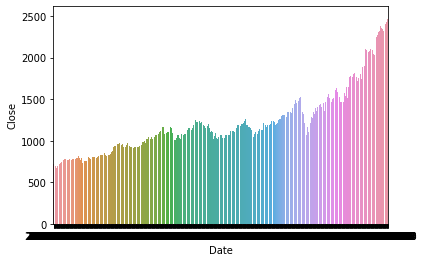

In [8]:
res = sns.barplot(df['Date'], df['Close'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


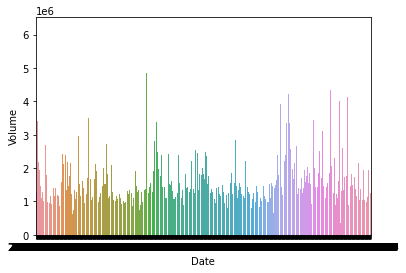

In [9]:
res = sns.barplot(df['Date'], df['Volume'])
plt.show()

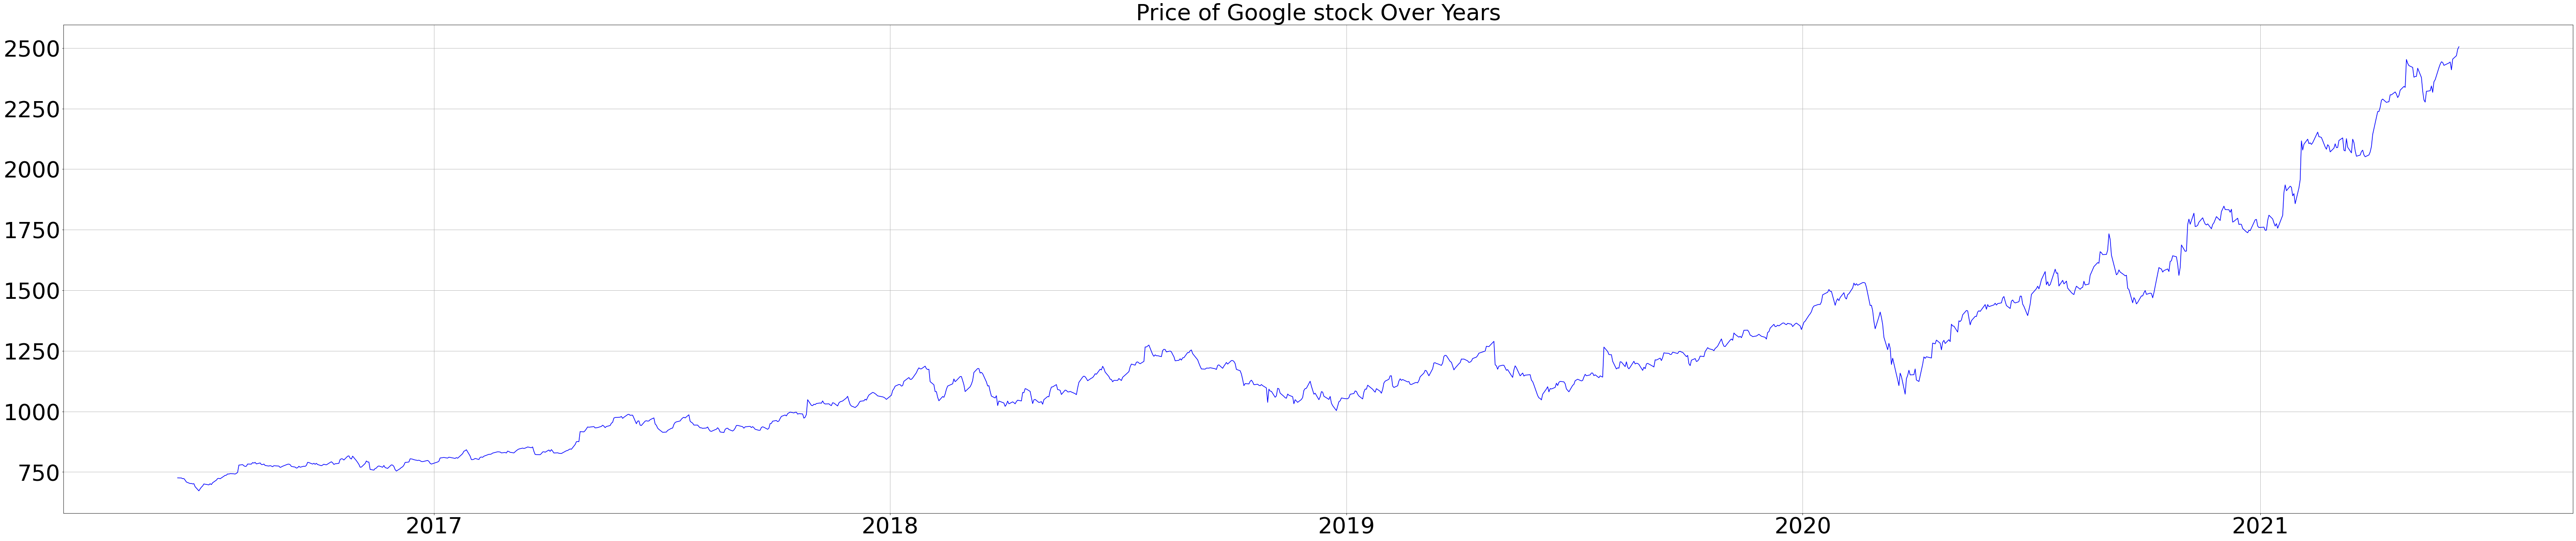

In [10]:
plt.figure(figsize = (100,20))
plt.plot(df["Date"],df["High"],color = "blue")
plt.title("Price of Google stock Over Years", fontsize = 50)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.grid()
plt.show()

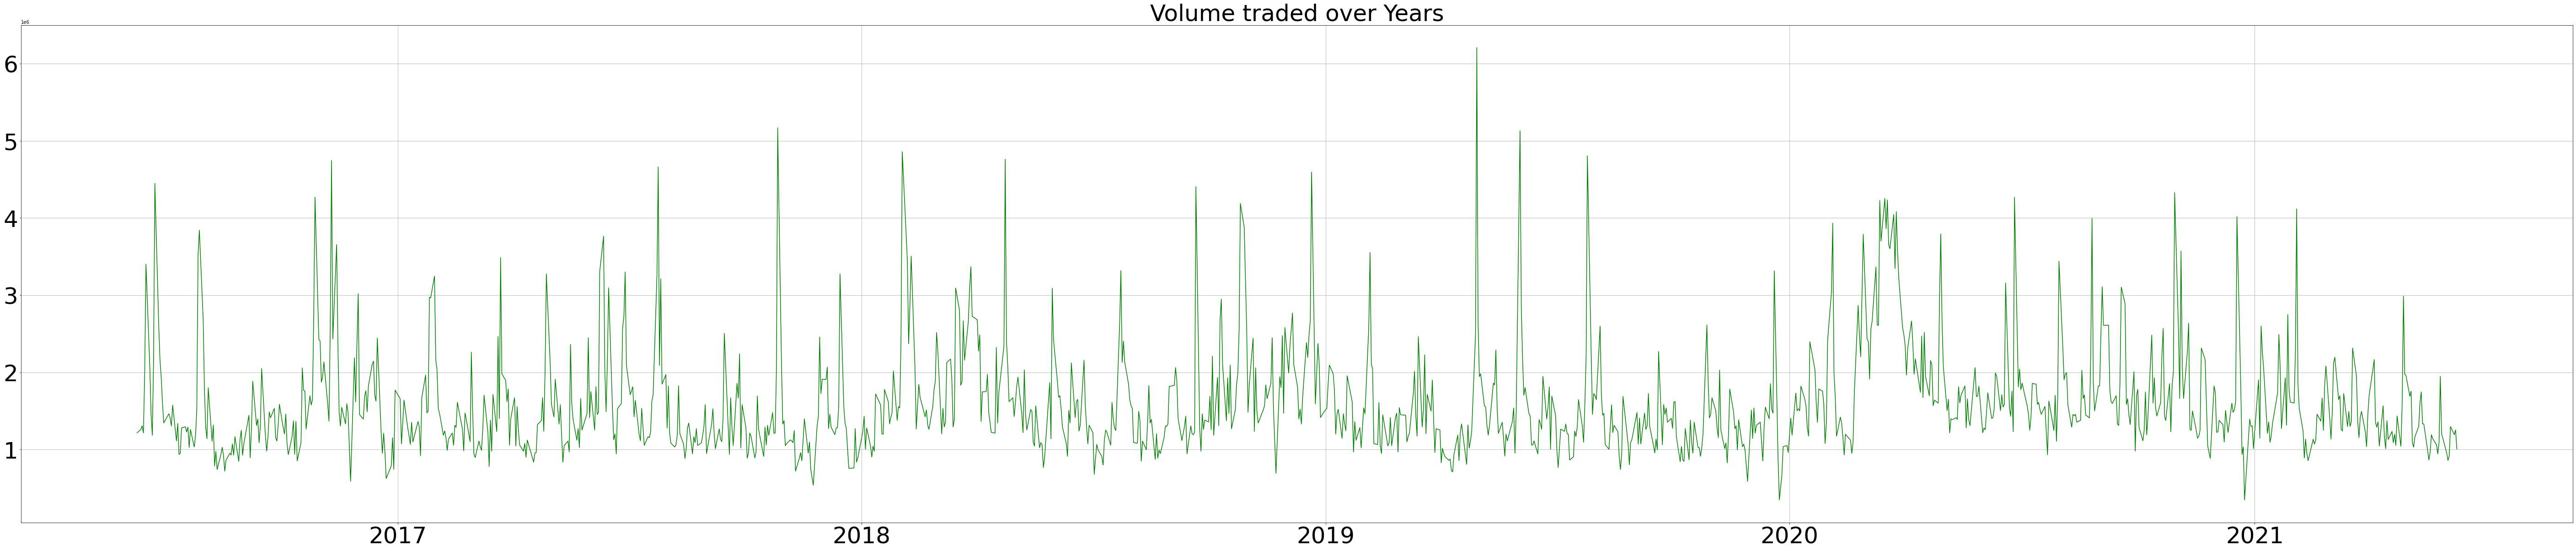

In [11]:
plt.figure(figsize = (100,20))
plt.plot(df["Date"],df["Volume"],color = "green")
plt.title("Volume traded over Years", fontsize = 50)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.grid()
plt.show()

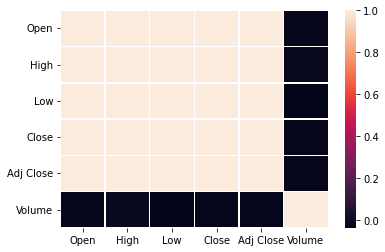

In [12]:
#heatmap
sns.heatmap(df.corr(), cbar = True, linewidths = 0.5)

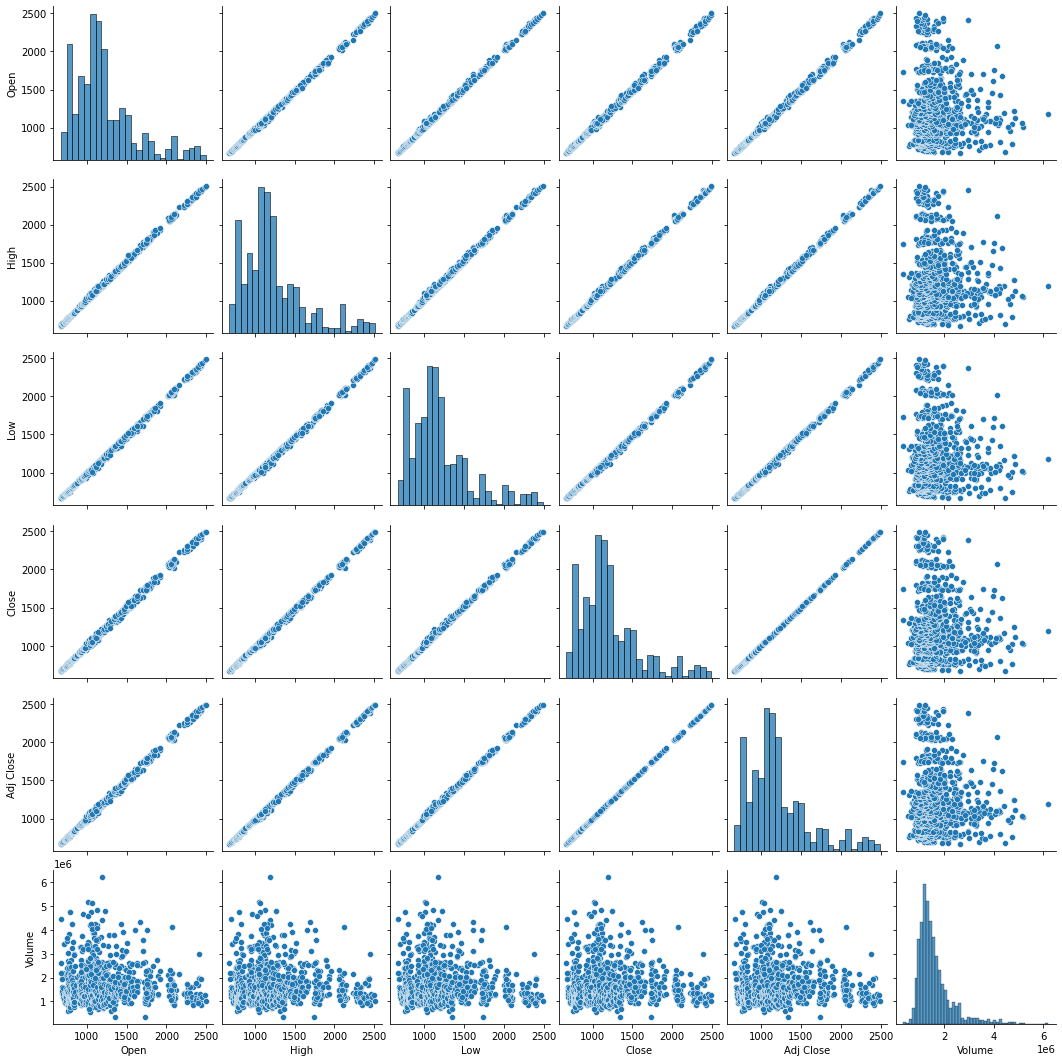

In [13]:
sns.pairplot(df,palette='rocket')


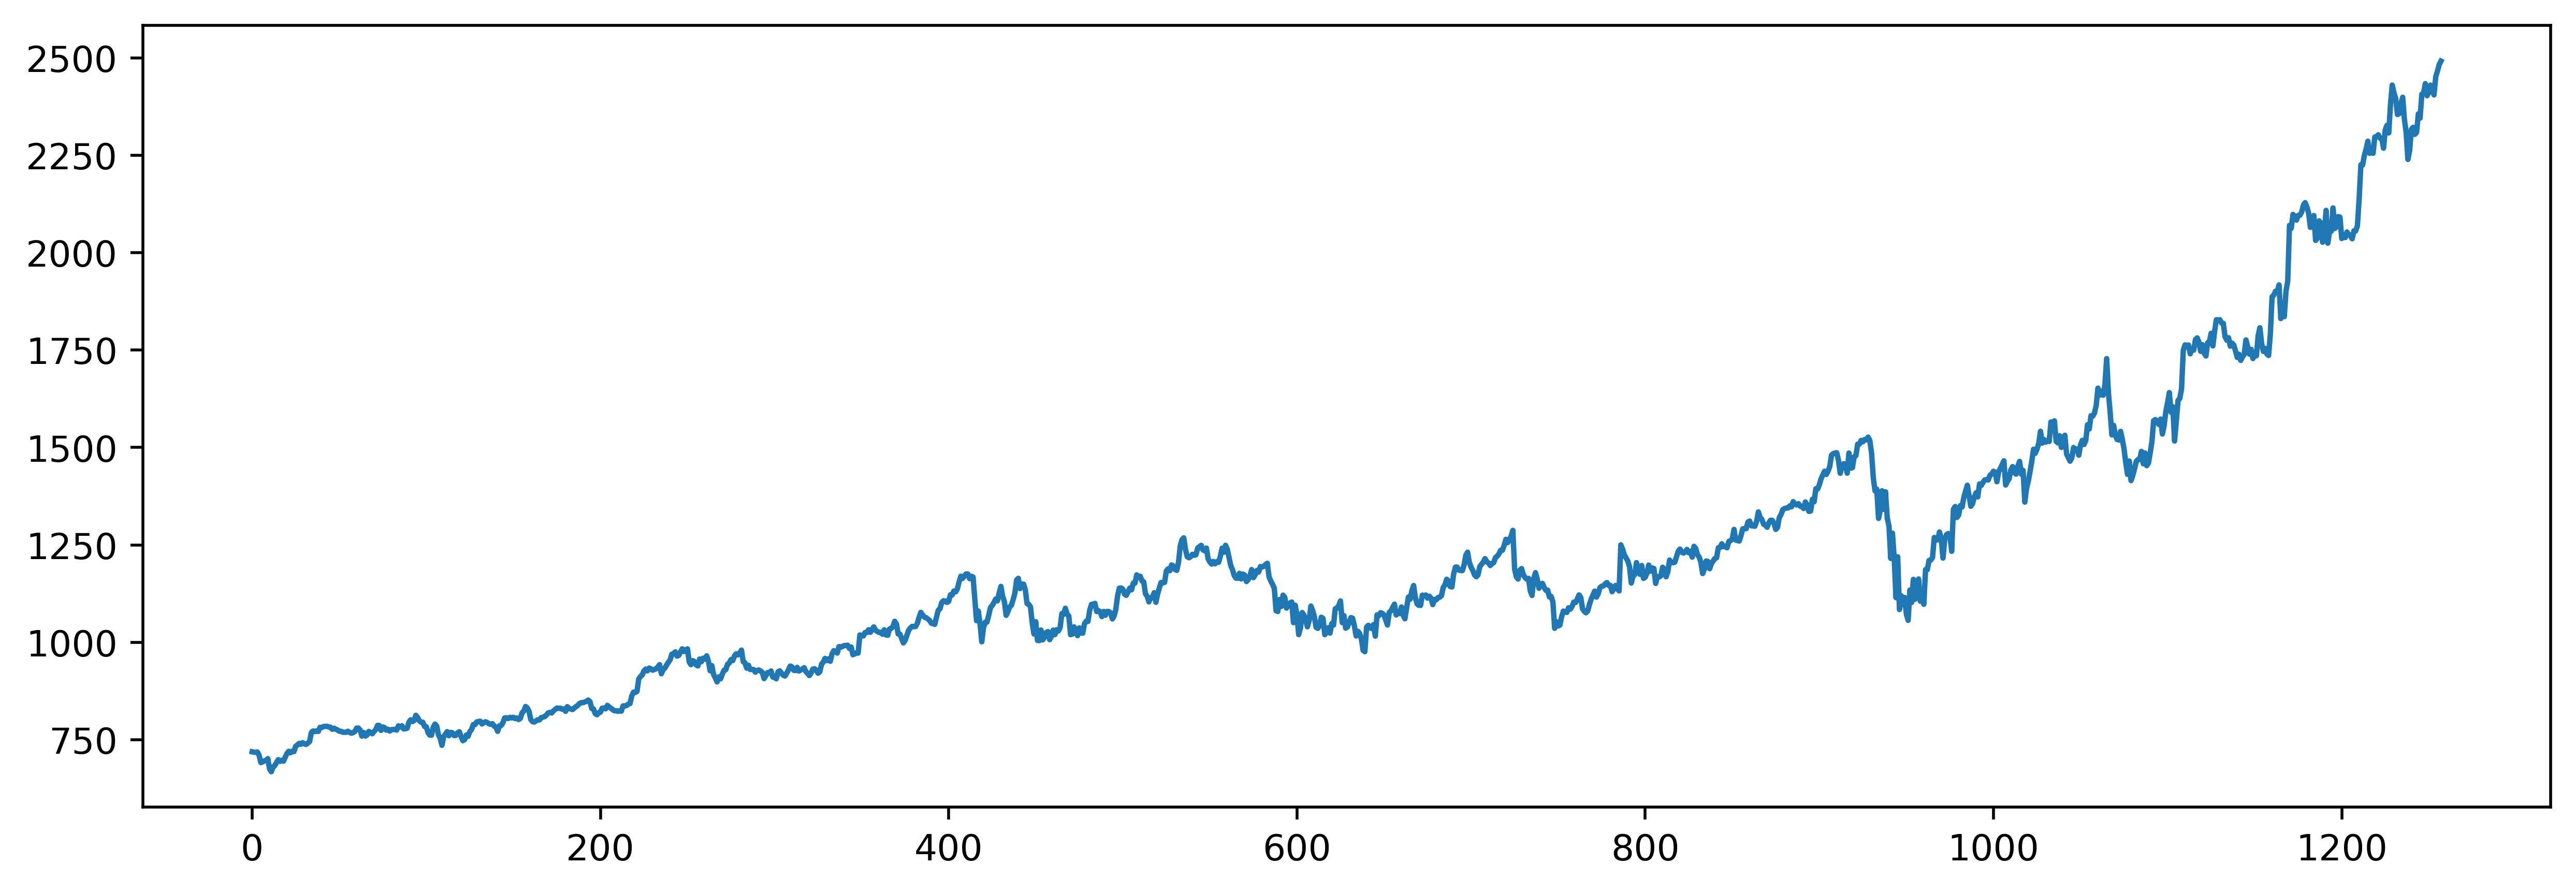

In [14]:
plt.figure(figsize=(12,4),dpi=500)
plt.plot(df.Close)
plt.show()

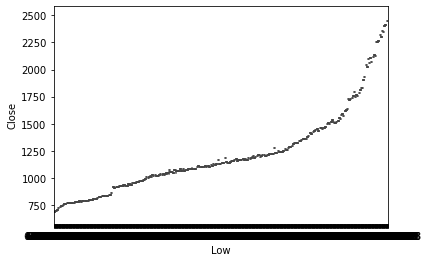

In [15]:
sns.boxplot(x='Low',y='Close',data=df)

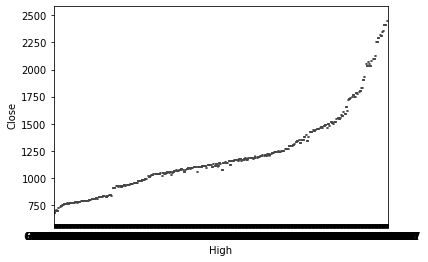

In [16]:
sns.boxplot(x='High',y='Close',data=df)

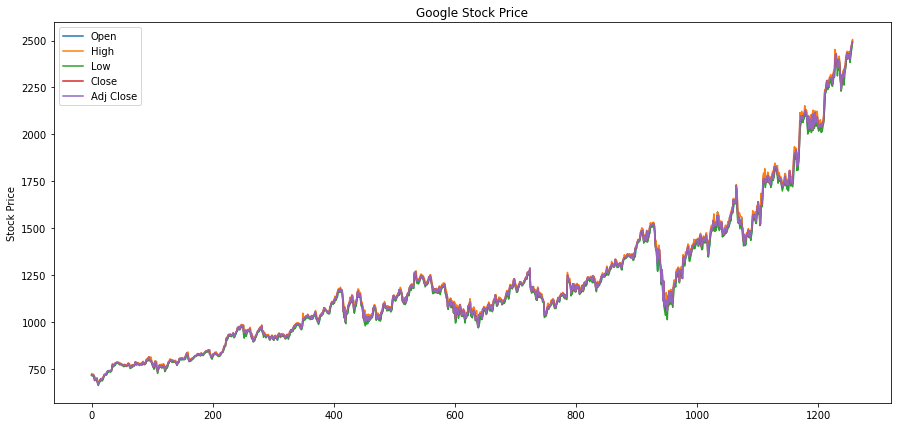

In [19]:
df['Open'].plot(label='Open',figsize=(15,7))
df['High'].plot(label='High')
df['Low'].plot(label='Low')
df['Close'].plot(label='Close')
df['Adj Close'].plot(label='Adj Close')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Google Stock Price')
plt.show()

**Using Matplotlib and Seaborn,twe were able plot various plots of different variables in columns. Now we'll proceed with Linear Regession Model.**

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import tensorflow as tf 
from sklearn.model_selection import train_test_split  
import cv2 
import io
%matplotlib inline

In [26]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df1= pd.read_csv("/content/drive/MyDrive/SoC Files/GOOG_train.csv", index_col = "Date", parse_dates = True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [29]:
X= df1.drop("Close",axis=1)
Y= df1["Close"]
print(X,Y)

                   Open         High          Low    Adj Close   Volume
Date                                                                   
2016-06-10   719.469971   725.890015   716.429993   719.409973  1216400
2016-06-13   716.510010   725.440002   716.510010   718.359985  1258900
2016-06-14   716.479980   722.469971   713.119995   718.270020  1306100
2016-06-15   719.000000   722.979980   717.309998   718.919983  1214500
2016-06-16   714.909973   716.650024   703.260010   710.359985  1982500
...                 ...          ...          ...          ...      ...
2021-06-03  2395.020020  2409.745117  2382.830078  2404.610107   917300
2021-06-04  2422.520020  2453.858887  2417.770020  2451.760010  1297400
2021-06-07  2451.320068  2468.000000  2441.072998  2466.090088  1192500
2021-06-08  2479.899902  2494.495117  2468.239990  2482.850098  1253000
2021-06-09  2499.500000  2505.000000  2487.330078  2491.399902  1006300

[1258 rows x 5 columns] Date
2016-06-10     719.409973
2016-06-

In [30]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X = pd.DataFrame(data=scaling.fit_transform(X),columns=X.columns)
print(X)

          Open      High       Low  Adj Close    Volume
0    -1.299596 -1.297105 -1.291053  -1.299586 -0.561034
1    -1.307400 -1.298275 -1.290840  -1.302348 -0.500569
2    -1.307479 -1.306001 -1.299865  -1.302585 -0.433417
3    -1.300835 -1.304674 -1.288710  -1.300875 -0.563737
4    -1.311618 -1.321139 -1.326117  -1.323392  0.528908
...        ...       ...       ...        ...       ...
1253  3.117836  3.082731  3.145600   3.133314 -0.986568
1254  3.190337  3.197474  3.238625   3.257341 -0.445794
1255  3.266266  3.234256  3.300667   3.295036 -0.595037
1256  3.341614  3.303172  3.372997   3.339123 -0.508963
1257  3.393288  3.330496  3.423823   3.361613 -0.859946

[1258 rows x 5 columns]


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
Y_train_predict= model.predict(X_train)
rmse= (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2= r2_score(Y_train,Y_train_predict)

In [34]:
output = pd.DataFrame(Y_train[0:10])
output['Prediction'] = Y_train_predict[0:10]
output['Difference'] = output['Prediction'] - output['Close']
print(output)
print("\n \n")
print("Training Performance of Model:","\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])


                  Close   Prediction    Difference
Date                                              
2017-01-27   823.309998   823.309998 -2.273737e-13
2018-03-05  1090.930054  1090.930054  0.000000e+00
2018-08-22  1207.329956  1207.329956  0.000000e+00
2020-05-12  1375.739990  1375.739990  0.000000e+00
2020-02-27  1318.089966  1318.089966  0.000000e+00
2018-06-06  1136.880005  1136.880005  0.000000e+00
2019-12-12  1350.270020  1350.270020  0.000000e+00
2017-08-16   926.960022   926.960022 -1.136868e-13
2018-12-21   979.539978   979.539978 -1.136868e-13
2018-03-08  1126.000000  1126.000000  0.000000e+00

 

Training Performance of Model: 

RMSE is 2.029518222562572e-13
R2 score is 1.0
Open :  -2.0799647751284685e-13
High :  5.400124791776761e-13
Low :  -8.526512829121202e-14
Adj Close :  380.1574742184067
Volume :  -7.549516567451064e-15


In [35]:
Y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

output = pd.DataFrame(Y_test[0:10])
output['Prediction'] = Y_test_predict[0:10]
output['Difference'] = output['Prediction'] - output['Close']
print(output)
print("\n \n")
print("Testing Performance of Model:","\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


                  Close   Prediction    Difference
Date                                              
2016-06-17   691.719971   691.719971 -3.410605e-13
2018-05-29  1060.319946  1060.319946  0.000000e+00
2016-08-24   769.640015   769.640015 -2.273737e-13
2020-05-11  1403.260010  1403.260010  0.000000e+00
2017-03-08   835.369995   835.369995 -2.273737e-13
2016-07-07   695.359985   695.359985 -2.273737e-13
2017-09-13   935.090027   935.090027 -2.273737e-13
2018-06-21  1157.660034  1157.660034  0.000000e+00
2017-11-17  1019.090027  1019.090027 -1.136868e-13
2018-09-17  1156.050049  1156.050049  0.000000e+00

 

Testing Performance of Model: 

RMSE is 1.9096101590004322e-13
R2 score is 1.0


<Figure size 2880x1800 with 0 Axes>

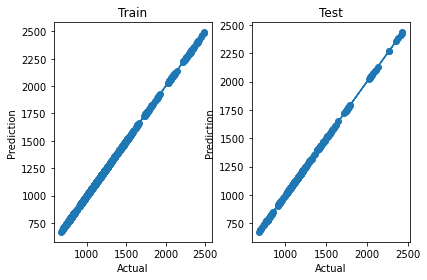

In [36]:
plt.figure(figsize = (40,25))
fig = plt.subplots(1,2)
plt.subplot(1,2,1)
plt.title('Train')
plt.scatter(Y_train, Y_train_predict)
plt.plot(Y_train,Y_train_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.subplot(1,2,2)
plt.tight_layout()
plt.scatter(Y_test, Y_test_predict)
plt.plot(Y_test,Y_test_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test')
plt.show()

Now we'll proceed with LSTM approach.

# **LSTM**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import cv2 
import io

In [38]:
df2= pd.read_csv("/content/drive/MyDrive/SoC Files/GOOG_train.csv", index_col = "Date", parse_dates = True)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [39]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-10 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [41]:
df2["Close"] =  df2["Close"].astype(float)

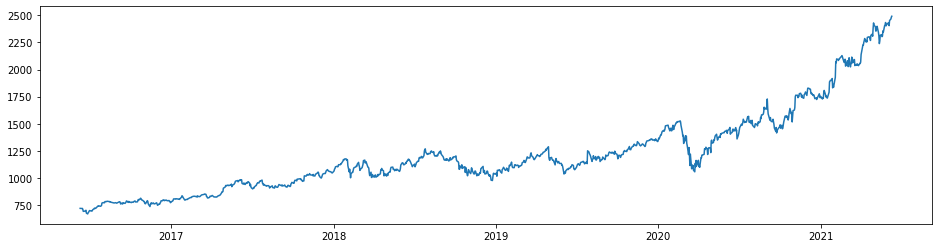

In [42]:
plt.figure(figsize = (16,4))
plt.plot(df2.index, df2["Close"])

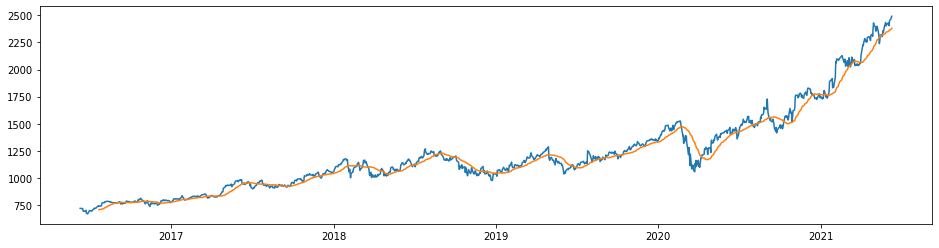

In [43]:
df2["Close-30Days"] = df2["Close"].rolling(window = 30).mean()
plt.figure(figsize = (16,4))
plt.plot(df2.index, df2["Close"])
plt.plot(df2.index, df2["Close-30Days"])

In [44]:
df2.rolling(window = 30).mean().head(90)

,Open,High,Low,Close,Adj Close,Volume,Close-30Days
Date,,,,,,,
2016-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016-10-11,773.991667,778.458529,769.807068,774.285335,774.285335,1.280757e+06,772.865678
2016-10-12,774.472666,778.913995,770.314400,774.853668,774.853668,1.274337e+06,773.101445
2016-10-13,774.946332,779.318327,770.568400,775.225002,775.225002,1.278227e+06,773.320856


In [45]:
X_train = df2["Close"]
X_train = pd.DataFrame(X_train)
X_train.head()

,Close
Date,
2016-06-10,719.409973
2016-06-13,718.359985
2016-06-14,718.270020
2016-06-15,718.919983
2016-06-16,710.359985


In [46]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

[[0.02805597]
 [0.02748005]
 [0.0274307 ]
 ...
 [0.98611746]
 [0.9953104 ]
 [1.        ]]


In [47]:
print(X_train_scaled.shape)

(1258, 1)


In [48]:
X_train_scaled_final = []
Y_train_scaled_final = []

In [49]:
for i in range(30,1258):
  X_train_scaled_final.append(X_train_scaled[i-30:i,0])
  Y_train_scaled_final.append(X_train_scaled[i,0])

X_train_scaled = np.array(X_train_scaled_final)
Y_train_scaled = np.array(Y_train_scaled_final)

In [50]:
print(X_train_scaled.shape)

(1228, 30)


In [51]:
X_train_scaled= X_train_scaled.reshape(1228,30,1)
print(Y_train_scaled.shape)

(1228,)


In [52]:
lstm = Sequential()
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_scaled.shape[1], 1)))
lstm.add(Dropout(0.15))
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.15))
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.15))
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.15))
lstm.add(Dense(units = 1))

In [53]:
lstm.compile(optimizer = "adam", loss = "mean_squared_error")
lstm.fit(X_train_scaled, Y_train_scaled, epochs = 10, batch_size = 30)

Epoch 1/10
41/41 [==============================] - 12s 68ms/step - loss: 0.0213
Epoch 2/10
41/41 [==============================] - 3s 67ms/step - loss: 0.0028
Epoch 3/10
41/41 [==============================] - 3s 66ms/step - loss: 0.0025
Epoch 4/10
41/41 [==============================] - 3s 67ms/step - loss: 0.0030
Epoch 5/10
41/41 [==============================] - 3s 67ms/step - loss: 0.0025
Epoch 6/10
41/41 [==============================] - 3s 68ms/step - loss: 0.0024
Epoch 7/10
41/41 [==============================] - 3s 68ms/step - loss: 0.0023
Epoch 8/10
41/41 [==============================] - 3s 67ms/step - loss: 0.0022
Epoch 9/10
41/41 [==============================] - 3s 68ms/step - loss: 0.0019
Epoch 10/10
41/41 [==============================] - 3s 68ms/step - loss: 0.0019


In [54]:
X_train = pd.DataFrame(X_train)

In [66]:
df2_test= pd.read_csv("/content/drive/MyDrive/SoC Files/GOOG_test.csv", index_col = "Date", parse_dates = True)
df2_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [67]:
Actual_price = df2_test["Close"]

In [68]:
df2_test = pd.DataFrame(df2_test["Close"])

In [69]:
print(df2_test)

                  Close
Date                   
2021-06-10  2521.600098
2021-06-11  2513.929932
2021-06-14  2527.040039
2021-06-15  2520.659912
2021-06-16  2513.929932
...                 ...
2022-06-03  2291.280029
2022-06-06  2340.209961
2022-06-07  2344.590088
2022-06-08  2344.760010
2022-06-09  2298.360107

[253 rows x 1 columns]


In [70]:
dataset = pd.concat((X_train, df2_test), axis = 0)
new = dataset[len(dataset) - len(df2_test) - 30:].values
new = new.reshape(-1,1)
new = scaler.transform(new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [71]:
X_test = []
for i in range(30,283):
  X_test.append(new[i - 30: i, 0])
X_test= np.array(X_test)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
prediction_price= lstm.predict(X_test)
prediction_price= scaler.inverse_transform(prediction_price)

In [72]:
prediction_price= pd.DataFrame(prediction_price)
prediction_price["Close"]= prediction_price
prediction_price.drop(columns=[0])

,Close
0,2436.157471
1,2444.338623
2,2453.016357
3,2462.138184
4,2471.558350
...,...
248,2308.698486
249,2303.602051
250,2301.030762
251,2300.993896


We can see our Prediction model

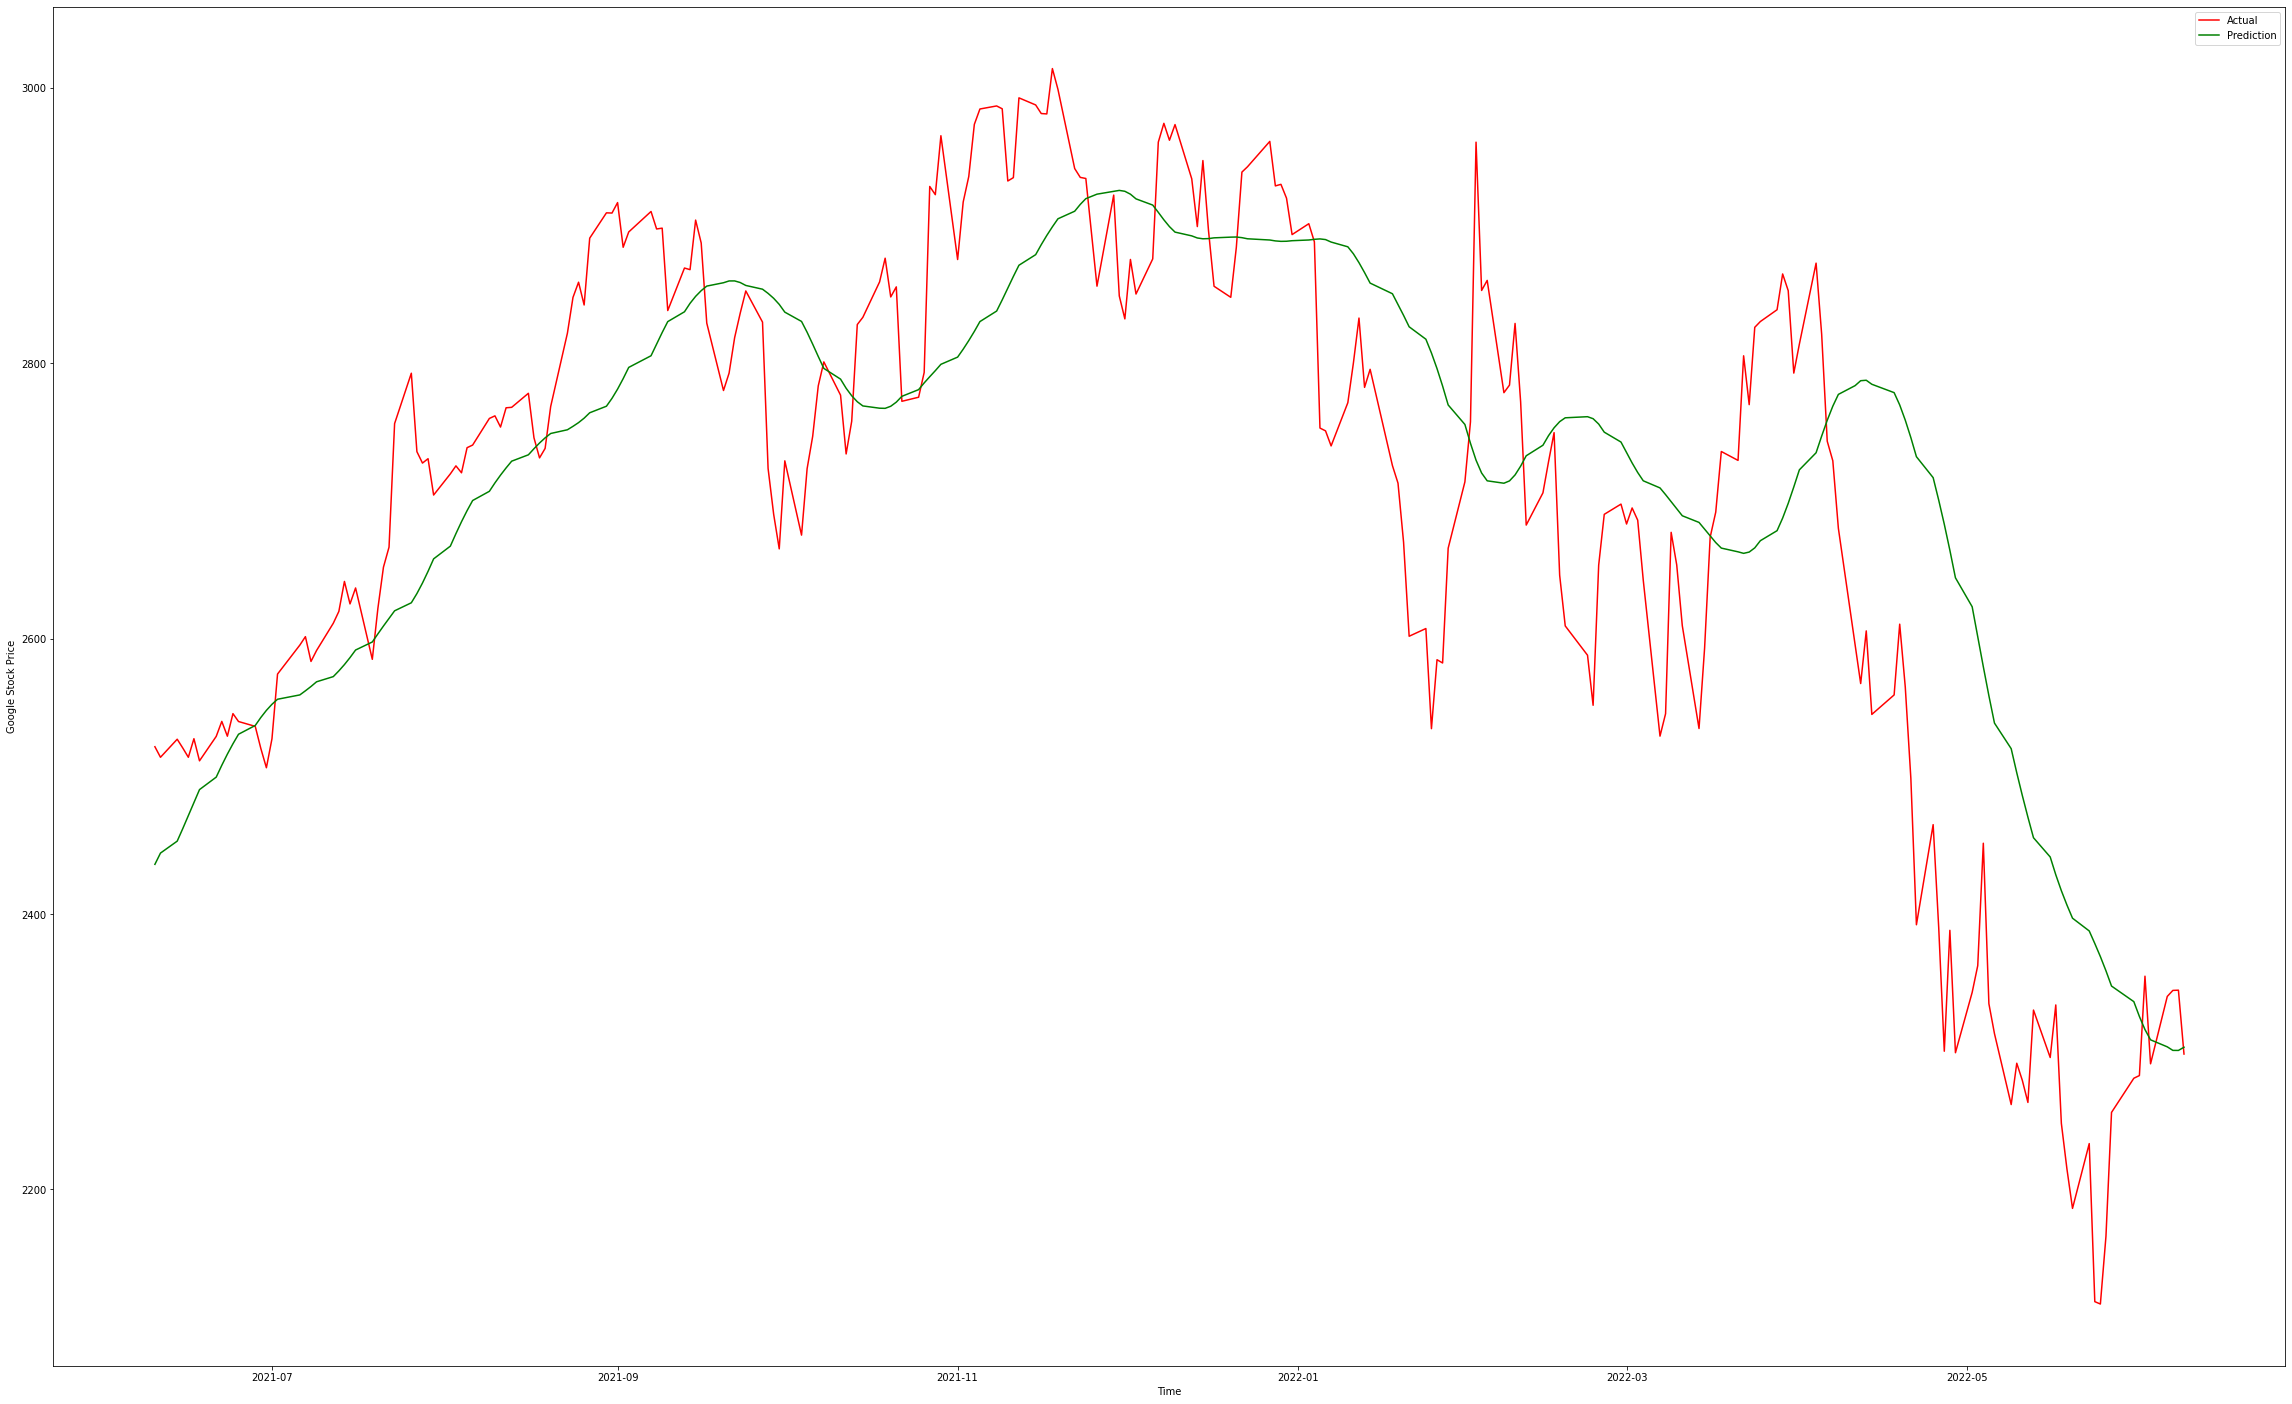

In [73]:
plt.figure(figsize = (40,25))
plt.plot(df2_test.index,Actual_price,color = 'red', label = 'Actual')
plt.plot(df2_test.index, prediction_price["Close"], color = 'green', label = 'Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Now we'll proceed with ARIMA model

# **ARIMA**

In [74]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing Packages for ARIMA approach

In [ ]:
!pip install pmdarima
!pip install matplotlib
!pip install nb-black

In [76]:
from pmdarima.arima import auto_arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [77]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df3 = pd.read_csv("/content/drive/MyDrive/SoC Files/GOOG_train.csv", index_col='Date', parse_dates=True, date_parser=dateparse).fillna(0)
df3=df3.dropna()
print('Shape of data',df.shape)
df3.head()
df3
print(df3.head())
df3.isnull()

Shape of data (1258, 7)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-06-10  719.469971  725.890015  716.429993  719.409973  719.409973   
2016-06-13  716.510010  725.440002  716.510010  718.359985  718.359985   
2016-06-14  716.479980  722.469971  713.119995  718.270020  718.270020   
2016-06-15  719.000000  722.979980  717.309998  718.919983  718.919983   
2016-06-16  714.909973  716.650024  703.260010  710.359985  710.359985   

             Volume  
Date                 
2016-06-10  1216400  
2016-06-13  1258900  
2016-06-14  1306100  
2016-06-15  1214500  
2016-06-16  1982500  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,False,False,False,False,False,False
2016-06-13,False,False,False,False,False,False
2016-06-14,False,False,False,False,False,False
2016-06-15,False,False,False,False,False,False
2016-06-16,False,False,False,False,False,False
...,...,...,...,...,...,...
2021-06-03,False,False,False,False,False,False
2021-06-04,False,False,False,False,False,False
2021-06-07,False,False,False,False,False,False


An ARIMA model is characterized by 3 terms (p, d, q):

- p is the order of the AR term

- d is the number of differencing required to make the time series stationary

- q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.



### Stationarity

Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times. 

And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model. 

We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [78]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df3.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 1.9368159937737082
p-value: 0.9985850027950328


In [79]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df3['Close'])

1. ADF :  1.9368159937737082
2. P-Value :  0.9985850027950328
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 1235
5. Critical Values :
	 1% :  -3.4356560275160835
	 5% :  -2.8638831211270817
	 10% :  -2.568017509711682


In [80]:
from statsmodels.graphics.tsaplots import plot_acf

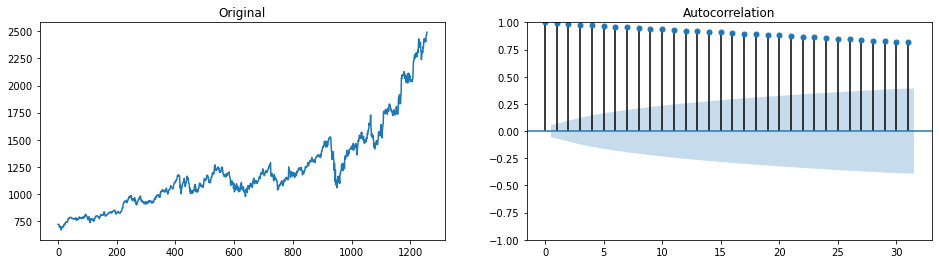

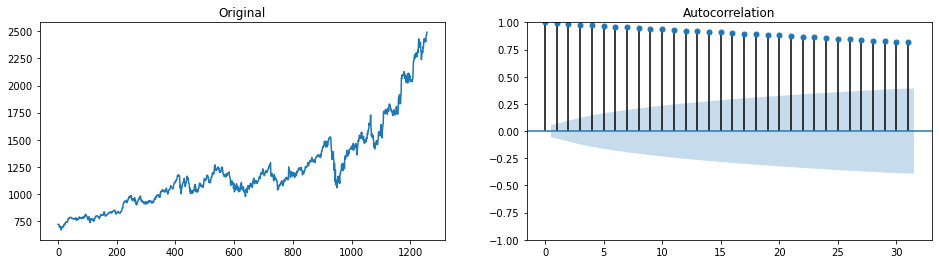

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.Close, ax=ax2)

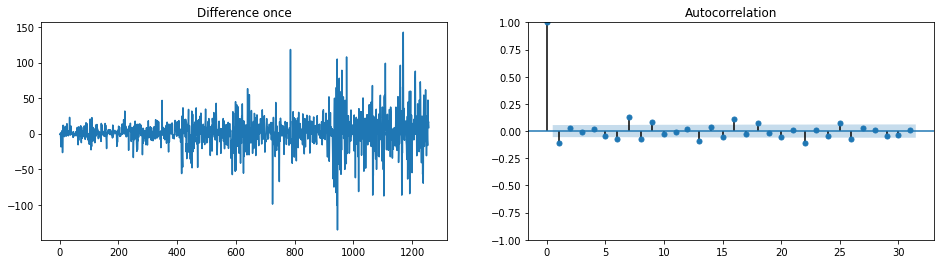

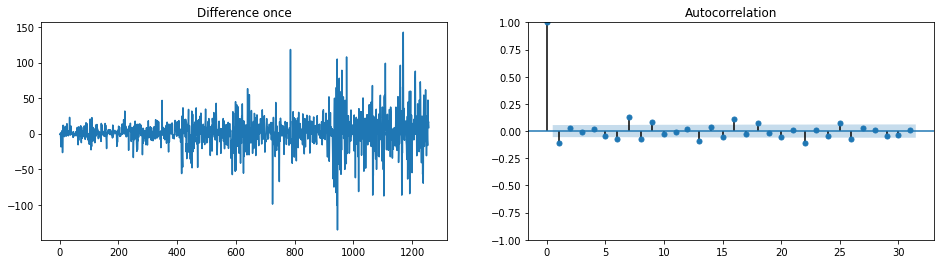

In [83]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2)

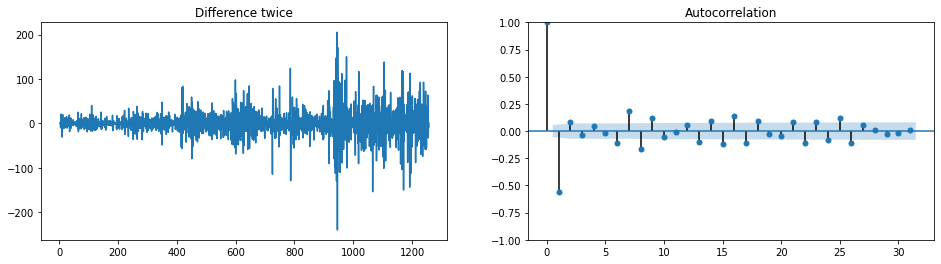

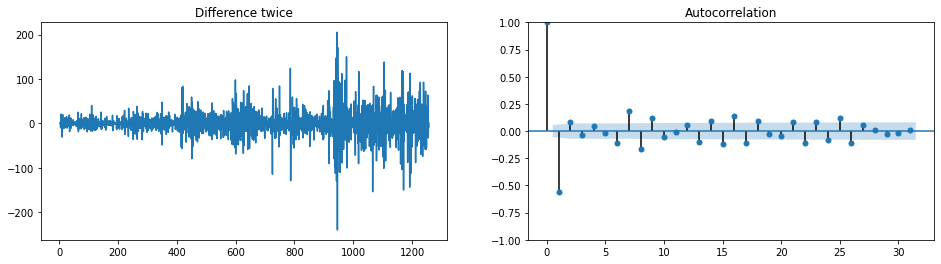

In [84]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2)

In [85]:
#!pipenv install --skip-lock pmdarima

from pmdarima.arima.utils import ndiffs

In [86]:
ndiffs(df.Close, test="adf")

1

#### p

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors. 

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags. 

In [87]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11344.912, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11352.162, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11339.446, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11340.105, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11355.272, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11341.026, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11340.960, Time=1.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11342.904, Time=2.92 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11343.758, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 9.333 seconds


In [89]:
print(df3.shape)
train=df3.iloc[0:1228]
test=df3.iloc[1228:1258]
print(train.shape,test.shape)

(1258, 6)
(1228, 6) (30, 6)


In [90]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(1,1,0))
model=model.fit()
model.summary()

#import statsmodels.api as sm
#model = sm.tsa.arima.ARIMA(df.Close, order=(1, 1, 4))
#result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1228
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5511.339
Date:                Wed, 20 Jul 2022   AIC                          11026.678
Time:                        09:21:48   BIC                          11036.903
Sample:                             0   HQIC                         11030.525
                               - 1228                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1167      0.016     -7.095      0.000      -0.149      -0.084
sigma2       467.0141      8.958     52.135      0.000     449.457     484.571
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2494.61
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              11.66   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

DatetimeIndex(['2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06',
               '2021-06-07', '2021-06-08'],
              dtype='datetime64[ns]', freq='D')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


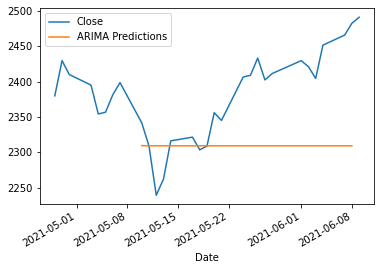

In [91]:
start=len(train)
end=len(train)+len(test)-1
#pred.plot(legend=True)

#start=len(train)
#end=len(train)+len(test)-1
#pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
#pred.plot(legend=True)
test['Close'].plot(legend=True)

index_future_dates=pd.date_range(start='2021-05-10',end='2021-06-08')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(index_future_dates)
pred.index=index_future_dates
pred.plot(legend=True)
#print(pred)

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.01186842],
        [0.        , 0.01186842, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.01186842, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.01186842, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.01186842, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.01186842, 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([-123.16238253,  -38.90514698,   45.35208858,  129.60932413,
         213.86655968,  298.12379523,  382.38103079,  466.63826634,
         550.89550189,  635.15273745,  719.409973  ]),
 <a list of 1228 Lists of Patches objects>)

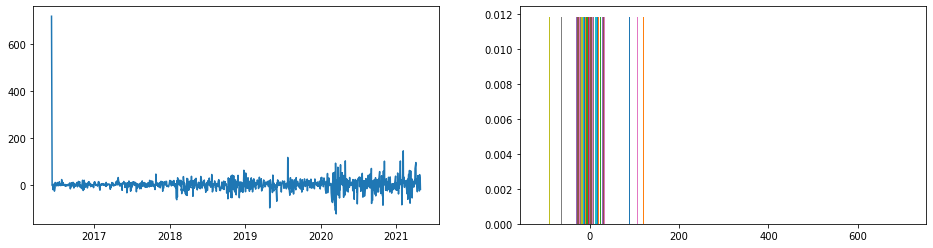

In [93]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

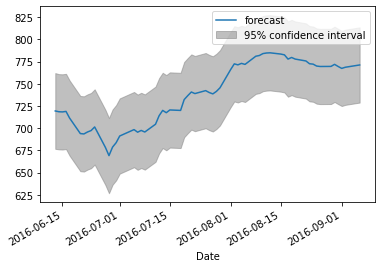

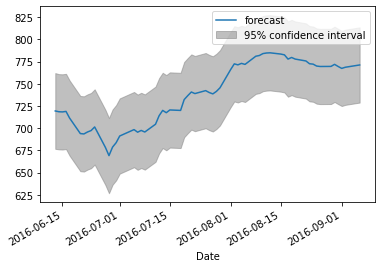

In [94]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model,
    start=1,
    end=60,
    dynamic=False,
)

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Close'].mean()
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)


94.03515161983164


In [96]:
df4 = pd.read_csv("/content/drive/MyDrive/SoC Files/GOOG_test.csv", index_col='Date', parse_dates=True)
df4=df4.dropna()
print('Shape of data',df2.shape)
model2=ARIMA(df4['Close'],order=(1,1,0))
model2=model2.fit()
df4.tail()

Shape of data (1258, 7)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-03,2319.850098,2327.290039,2273.360107,2291.280029,2291.280029,1252600
2022-06-06,2334.850098,2387.969971,2330.565918,2340.209961,2340.209961,1189300
2022-06-07,2312.959961,2354.972900,2302.510010,2344.590088,2344.590088,1320700
2022-06-08,2337.530029,2372.919922,2333.935059,2344.760010,2344.760010,1127200
2022-06-09,2326.830078,2367.000000,2297.340088,2298.360107,2298.360107,1157100


DatetimeIndex(['2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-19',
               ...
               '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03',
               '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07',
               '2022-06-08', '2022-06-09'],
              dtype='datetime64[ns]', length=365, freq='D')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


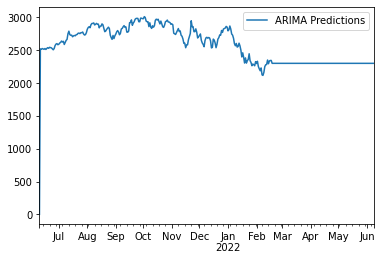

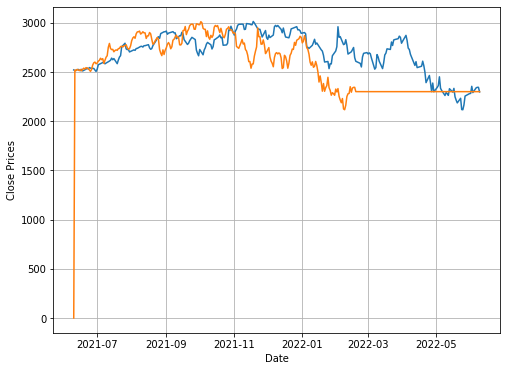

In [108]:
index_future_dates=pd.date_range(start='2021-06-10',end='2022-06-09')
print(index_future_dates)
predi=model2.predict(start=0,end=len(df4)+111,typ='levels').rename('ARIMA Predictions')
predi.index=index_future_dates
#print(pred)
predi.plot(legend=True)
#df2['Close'].plot(legend=True)
plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df4['Close'])
plt.plot(predi)
plt.title('')
plt.show()

Therefore we get a reasonable model with a little lag for our Stock price prediction of Google stock. 